170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5318 - accuracy: 0.4394 - val_loss: 1.2995 - val_accuracy: 0.5354
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1649 - accuracy: 0.5874 - val_loss: 1.1191 - val_accuracy: 0.6061
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0261 - accuracy: 0.6389 - val_loss: 1.0140 - val_accuracy: 0.6440
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9363 - accuracy: 0.6701 - val_loss: 0.9451 - val_accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8626 - accuracy: 0.6959 - val_loss: 0.9480 - val_accuracy: 0.6698
Epoch 6/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8094 - accuracy: 0.7142 - val_loss: 0.9216 - val_accuracy: 0.6814
Epoch 7/10
1563/1563 [==============================] - 8

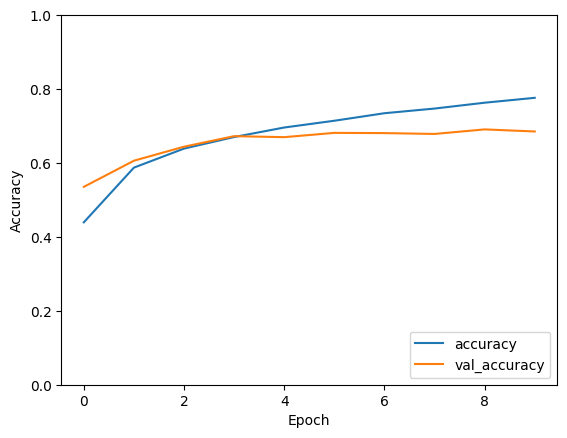

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Plot accuracy and loss over training epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
